Mean Squared Error (MSE): 30799.603542320972
R-squared (R²): 0.0042063664102970355
Model Coefficients: [-2.55364813e-03  1.27682406e+00  1.67038254e+00  1.09576318e+01
  1.45825852e+02]
Model Intercept: -580.6595739019871


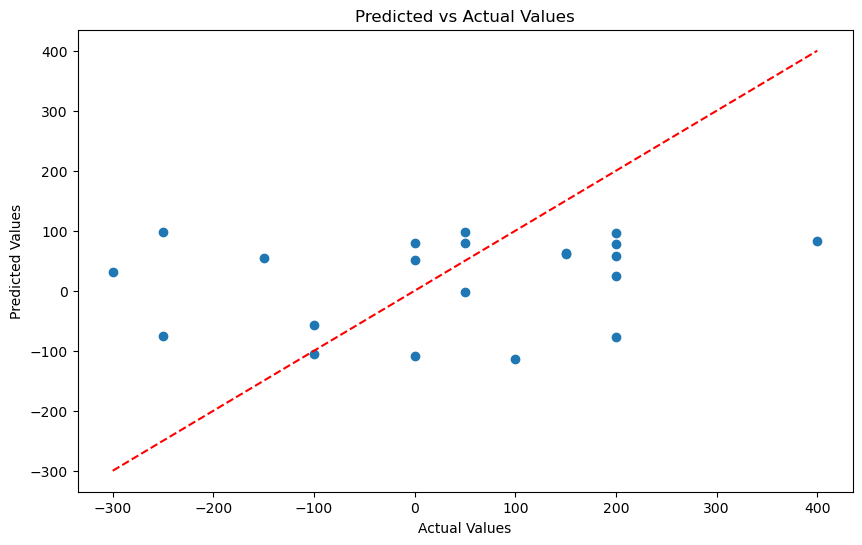

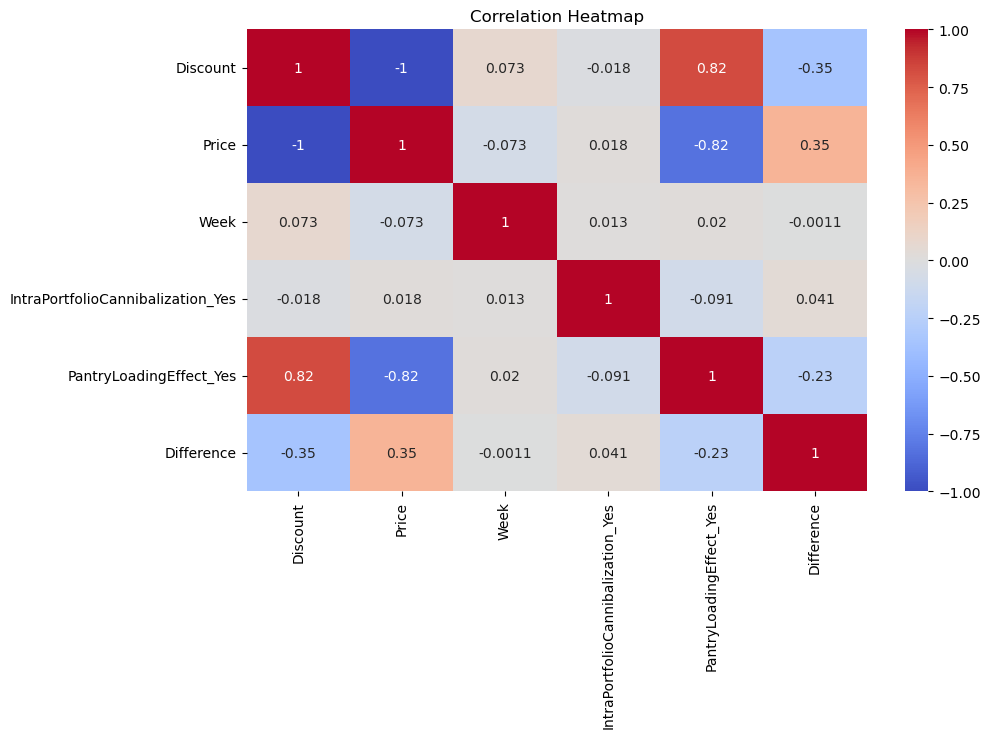

In [2]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "CSV file path"
data = pd.read_csv(file_path)

data['Discount'] = data['Discount'].str.rstrip('%').astype('float') / 100
data['Week'] = data['Week'].str.extract('(\d+)').astype(int)

total_sales_per_week = data.groupby('Week')['Price'].sum().reset_index()
total_sales_per_week = total_sales_per_week.sort_values(by='Week').reset_index(drop=True)
total_sales_per_week['Difference'] = total_sales_per_week['Price'].diff()

data = data.merge(total_sales_per_week[['Week', 'Difference']], on='Week')

data = data.dropna(subset=['Difference'])

data = pd.get_dummies(data, columns=['IntraPortfolioCannibalization', 'PantryLoadingEffect'], drop_first=True)

X = data[['Discount', 'Price', 'Week', 'IntraPortfolioCannibalization_Yes', 'PantryLoadingEffect_Yes']]
y = data['Difference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_coefficients = model.coef_
model_intercept = model.intercept_

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Model Coefficients: {model_coefficients}')
print(f'Model Intercept: {model_intercept}')


X_test_sorted = X_test.sort_values(by='Discount')
y_pred_sorted = model.predict(X_test_sorted)

fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test_sorted['Discount'], y=y_test, mode='markers', name='Actual Data',
                         hovertemplate='Discount: %{x}<br>Difference: %{y}'))
fig.add_trace(go.Scatter(x=X_test_sorted['Discount'], y=y_pred_sorted, mode='lines', name='Regression Line',
                         line=dict(color='red'), hovertemplate='Discount: %{x}<br>Predicted Difference: %{y}'))
fig.update_layout(title='Linear Regression: Difference in Total Sales vs Discount',
                  xaxis_title='Discount',
                  yaxis_title='Difference in Total Sales')
fig.show()

fig = px.line(total_sales_per_week, x='Week', y='Price', title='Total Sales per Week', markers=True)
fig.update_traces(hovertemplate='Week: %{x}<br>Total Sales: %{y}')
fig.update_layout(xaxis_title='Week', yaxis_title='Total Sales')
fig.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

corr_matrix = data[['Discount', 'Price', 'Week', 'IntraPortfolioCannibalization_Yes', 'PantryLoadingEffect_Yes', 'Difference']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()





